In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

# relaxation of DAC

In [2]:
class DAC:
    def __init__(self, init_value=0., tau=20, dt=10):
        self.init_value = init_value
        self.value = init_value
        self.trajectory = [init_value]
        self.tau = 45
        self.dt = 10
        self.alpha = np.exp(-dt/tau)
    def step(self):
        self.value = self.value * self.alpha - (1 - self.alpha) * np.random.uniform(-1,1)
        self.trajectory.append(np.copy(self.value))
    def get_trajectory(self):
        return np.array(self.trajectory)
    def get_time(self):
        return self.dt*np.arange(len(self.trajectory))
    def get_expected_value(self):
        n = len(self.trajectory)
        i = np.arange(n)
        return self.init_value * np.exp(-i*self.dt/self.tau)
    def get_std(self):
        n = len(self.trajectory)
        i = np.arange(n)
        std = np.array([np.sum(np.exp(-2*np.arange(idx)*self.dt/self.tau)) for idx in i])
        return (1 - self.alpha) * np.sqrt(std / 3)

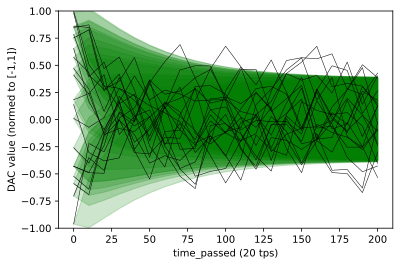

In [6]:
for i in range(20):
    if i < 190: 
        dac = DAC(np.random.uniform(-1,1))  # init_value=np.random.choice([-1,1])) # 
    else:
        dac = DAC(init_value=0.)
    for _ in range(20):
        dac.step()
    plt.plot(dac.get_time(), dac.get_trajectory(), color='black', linewidth=0.5)

    # plt.plot(dac.get_time(), dac.get_expected_value(), color='green', linewidth=2.5, label='expected value' if i == 19 else '')
    plt.fill_between(dac.get_time(), dac.get_expected_value() - dac.get_std(), dac.get_expected_value() + dac.get_std(), alpha=0.2, color='green')
plt.xlabel('time_passed ({} tps)'.format(len(dac.trajectory) - 1))
plt.ylabel('DAC value (normed to [-1,1])')
#plt.legend()
plt.ylim(-1,1)
plt.show()

# the gamma value

# the tau value